In [1]:
import pandas as pd
import numpy as np
import json

import geopandas as gpd
import branca.colormap as cm
import folium
from folium.plugins import TimeSliderChoropleth

%matplotlib inline

In [2]:
GOOGLE_DRIVE_BASE_PATH = "/content/drive/MyDrive/"
user = "Matthew"

if user == "Julia":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Matthew":
    DATA_PATH = "/Users/mdong/dataScience/projects-ml/ca-waste/" + "data/"
#     DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "Sustainability/ER131-Project/" + "data/"
elif user == "Samadi":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
elif user == "Shaye":
    DATA_PATH = GOOGLE_DRIVE_BASE_PATH + "..." + "data/"
    
print("User: {}\nPath to data: {}".format(user, DATA_PATH))

User: Matthew
Path to data: /Users/mdong/dataScience/projects-ml/ca-waste/data/


In [3]:
counties = gpd.read_file("../data/geospatial-data/CA_Counties_TIGER2016.shp") #YOUR CODE HERE

counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [4]:
counties.shape

(58, 18)

In [5]:
len(counties.NAME.unique())

58

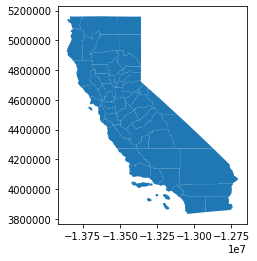

In [6]:
counties.plot()

In [7]:
county_shapes = counties[["NAME", "geometry"]]
county_shapes.rename(columns={"NAME":"County"}, inplace=True)
county_shapes.head()

/Users/mdong/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,County,geometry
0,Sierra,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,Sacramento,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,Santa Barbara,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,Calaveras,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,Ventura,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


In [8]:
complete_feature_df = pd.read_csv(DATA_PATH + "complete_feature_df.csv")
complete_feature_df.head()

,Year,Waste Produced (Tons),County,Population,Electricity Usage (GWh)
0,2000.0,1762385.98,San Bernardino,1710139.0,3950.485414
1,2001.0,1888556.78,San Bernardino,1741416.0,3717.427367
2,2002.0,1931424.51,San Bernardino,1782268.0,3817.733496
3,2003.0,2107128.88,San Bernardino,1825379.0,4251.079140
4,2004.0,2235251.83,San Bernardino,1875063.0,5044.577708


In [9]:
complete_feature_df["Waste Produced (Tons)"] = np.log(complete_feature_df["Waste Produced (Tons)"])

In [10]:
complete_feature_df["ModifiedTime"] = pd.to_datetime(complete_feature_df['Year'], format="%Y") + pd.Timedelta(days=5)
complete_feature_df["ModifiedTime"] = (complete_feature_df["ModifiedTime"].astype(int) // 10**9).astype('U10')
complete_feature_df.head(2)

,Year,Waste Produced (Tons),County,Population,Electricity Usage (GWh),ModifiedTime
0,2000.0,14.382179,San Bernardino,1710139.0,3950.485414,947116800
1,2001.0,14.451323,San Bernardino,1741416.0,3717.427367,978739200


In [11]:
len(complete_feature_df.County.unique())

57

In [12]:
complete_feature_gdf = complete_feature_df.merge(county_shapes, on="County", how="inner")
# complete_feature_gdf = county_shapes.merge(complete_feature_df, on="County", how="inner")
complete_feature_gdf = complete_feature_gdf[["ModifiedTime", "County", "Waste Produced (Tons)", "geometry"]]
complete_feature_gdf.head()

,ModifiedTime,County,Waste Produced (Tons),geometry
0,947116800,San Bernardino,14.382179,"POLYGON ((-13098659.037 4127837.220, -13098658..."
1,978739200,San Bernardino,14.451323,"POLYGON ((-13098659.037 4127837.220, -13098658..."
2,1010275200,San Bernardino,14.473768,"POLYGON ((-13098659.037 4127837.220, -13098658..."
3,1041811200,San Bernardino,14.560837,"POLYGON ((-13098659.037 4127837.220, -13098658..."
4,1073347200,San Bernardino,14.619864,"POLYGON ((-13098659.037 4127837.220, -13098658..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122227390>]],
      dtype=object)

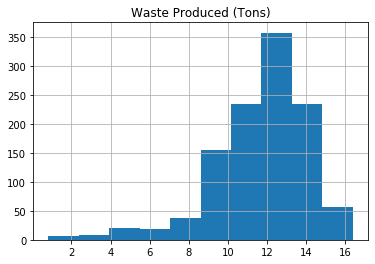

In [13]:
complete_feature_gdf.hist(["Waste Produced (Tons)"])

In [14]:
complete_feature_gdf.shape

(1130, 4)

In [15]:
max_colour = max(complete_feature_gdf['Waste Produced (Tons)'])
min_colour = min(complete_feature_gdf['Waste Produced (Tons)'])
cmap = cm.linear.YlOrRd_09.scale(min_colour, max_colour)
complete_feature_gdf['color'] = complete_feature_gdf['Waste Produced (Tons)'].map(cmap)
complete_feature_gdf.head()

,ModifiedTime,County,Waste Produced (Tons),geometry,color
0,947116800,San Bernardino,14.382179,"POLYGON ((-13098659.037 4127837.220, -13098658...",#bf0025ff
1,978739200,San Bernardino,14.451323,"POLYGON ((-13098659.037 4127837.220, -13098658...",#bd0026ff
2,1010275200,San Bernardino,14.473768,"POLYGON ((-13098659.037 4127837.220, -13098658...",#bd0026ff
3,1041811200,San Bernardino,14.560837,"POLYGON ((-13098659.037 4127837.220, -13098658...",#ba0026ff
4,1073347200,San Bernardino,14.619864,"POLYGON ((-13098659.037 4127837.220, -13098658...",#b80026ff


In [16]:
# county_list = complete_feature_gdf['County'].unique().tolist()
# county_idx = range(len(county_list))
# style_data = {}

# for idx in county_idx:
#     county = county_list[idx]
# #     print(idx, county)
#     county_df = complete_feature_gdf[complete_feature_gdf.County == county]
#     choropleth_info = {}
#     for _, row in county_df.iterrows():
#         year, color, opacity = row["Year"], row["color"], 0.7
#         choropleth_info[year] = {"color": color, "opacity": opacity}
#     style_data[str(idx)] = choropleth_info

In [17]:
from collections import OrderedDict

style_data = {}
for idx, row in complete_feature_gdf.iterrows():
    county = row["County"]
    county_df = complete_feature_gdf[complete_feature_gdf.County == county]
    choropleth_info = OrderedDict()
    for idx, row in county_df.iterrows():
        year, color, opacity = str(row["ModifiedTime"]), row["color"], 0.7
        choropleth_info[year] = {"color": color, "opacity": opacity}
    style_data[county] = choropleth_info

In [18]:
len(style_data.keys())

57

In [19]:
style_data.keys()

dict_keys(['San Bernardino', 'Tehama', 'Modoc', 'San Benito', 'Santa Barbara', 'Yolo', 'Sonoma', 'Tuolumne', 'San Mateo', 'Monterey', 'Alpine', 'Solano', 'Fresno', 'Tulare', 'Marin', 'Trinity', 'Humboldt', 'Calaveras', 'Inyo', 'Kings', 'Amador', 'Kern', 'San Luis Obispo', 'Mendocino', 'Ventura', 'Lassen', 'El Dorado', 'Yuba', 'Colusa', 'Mono', 'Merced', 'Los Angeles', 'Stanislaus', 'Del Norte', 'San Francisco', 'Contra Costa', 'Plumas', 'San Diego', 'Santa Clara', 'Sacramento', 'Nevada', 'Napa', 'Madera', 'Orange', 'Placer', 'Siskiyou', 'Alameda', 'Lake', 'San Joaquin', 'Sierra', 'Glenn', 'Butte', 'Mariposa', 'Imperial', 'Riverside', 'Shasta', 'Santa Cruz'])

In [20]:
style_data.get("Orange")

OrderedDict([('947116800', {'color': '#a70026ff', 'opacity': 0.7}),
             ('978739200', {'color': '#a70026ff', 'opacity': 0.7}),
             ('1010275200', {'color': '#a70026ff', 'opacity': 0.7}),
             ('1041811200', {'color': '#a60026ff', 'opacity': 0.7}),
             ('1073347200', {'color': '#a40026ff', 'opacity': 0.7}),
             ('1104969600', {'color': '#a30026ff', 'opacity': 0.7}),
             ('1136505600', {'color': '#a70026ff', 'opacity': 0.7}),
             ('1168041600', {'color': '#a90026ff', 'opacity': 0.7}),
             ('1199577600', {'color': '#ad0026ff', 'opacity': 0.7}),
             ('1231200000', {'color': '#b00026ff', 'opacity': 0.7}),
             ('1262736000', {'color': '#b10026ff', 'opacity': 0.7}),
             ('1294272000', {'color': '#b20026ff', 'opacity': 0.7}),
             ('1325808000', {'color': '#b20026ff', 'opacity': 0.7}),
             ('1357430400', {'color': '#b10026ff', 'opacity': 0.7}),
             ('1388966400', {'color'

In [21]:
style_data.get("Alameda")

OrderedDict([('947116800', {'color': '#c00125ff', 'opacity': 0.7}),
             ('978739200', {'color': '#c00125ff', 'opacity': 0.7}),
             ('1010275200', {'color': '#c10225ff', 'opacity': 0.7}),
             ('1041811200', {'color': '#c10225ff', 'opacity': 0.7}),
             ('1073347200', {'color': '#bf0125ff', 'opacity': 0.7}),
             ('1104969600', {'color': '#c00125ff', 'opacity': 0.7}),
             ('1136505600', {'color': '#c00125ff', 'opacity': 0.7}),
             ('1168041600', {'color': '#c10225ff', 'opacity': 0.7}),
             ('1199577600', {'color': '#c40424ff', 'opacity': 0.7}),
             ('1231200000', {'color': '#c50524ff', 'opacity': 0.7}),
             ('1262736000', {'color': '#c70623ff', 'opacity': 0.7}),
             ('1294272000', {'color': '#c80723ff', 'opacity': 0.7}),
             ('1325808000', {'color': '#c70623ff', 'opacity': 0.7}),
             ('1357430400', {'color': '#c70623ff', 'opacity': 0.7}),
             ('1388966400', {'color'

In [22]:
style_data.get("Los Angeles")

OrderedDict([('947116800', {'color': '#820026ff', 'opacity': 0.7}),
             ('978739200', {'color': '#820026ff', 'opacity': 0.7}),
             ('1010275200', {'color': '#830026ff', 'opacity': 0.7}),
             ('1041811200', {'color': '#820026ff', 'opacity': 0.7}),
             ('1073347200', {'color': '#830026ff', 'opacity': 0.7}),
             ('1104969600', {'color': '#800026ff', 'opacity': 0.7}),
             ('1136505600', {'color': '#840026ff', 'opacity': 0.7}),
             ('1168041600', {'color': '#860026ff', 'opacity': 0.7}),
             ('1199577600', {'color': '#890026ff', 'opacity': 0.7}),
             ('1231200000', {'color': '#8d0026ff', 'opacity': 0.7}),
             ('1262736000', {'color': '#8f0026ff', 'opacity': 0.7}),
             ('1294272000', {'color': '#8f0026ff', 'opacity': 0.7}),
             ('1325808000', {'color': '#8f0026ff', 'opacity': 0.7}),
             ('1357430400', {'color': '#8f0026ff', 'opacity': 0.7}),
             ('1388966400', {'color'

In [23]:
# county_shapes = complete_feature_gdf[['geometry', 'County']]
# county_shapes = gpd.GeoDataFrame(county_shapes)
# county_shapes = county_shapes.drop_duplicates().reset_index()
# county_shapes

In [24]:
# geojson = county_shapes.to_json()
# geojson = json.loads(geojson)
# geojson.keys()

In [25]:
import geojson
ca_counties_geojson_path = DATA_PATH + "geospatial-data/ca-counties-test.geojson"

with open(ca_counties_geojson_path) as f:
    ca_counties_geojson = geojson.load(f)

len(ca_counties_geojson)

2

In [26]:
ca_counties_geojson.keys()

dict_keys(['type', 'features'])

In [27]:
for feature in ca_counties_geojson.features:
    if feature["id"] == "Los Angeles":
        print(feature["id"])

Los Angeles


In [28]:
# for feature in ca_counties_geojson.features:
#     print(feature.properties["name"])
#     feature["id"] = feature.properties["name"]
#     print(feature.id)

In [29]:
# ca_counties_geojson.features[3]

In [30]:
with open(DATA_PATH + "geospatial-data/ca-counties-test.geojson", 'w') as f:
    geojson.dump(ca_counties_geojson, f)

In [31]:
# complete_feature_gdf.to_json()

In [32]:
complete_feature_gdf.head()

,ModifiedTime,County,Waste Produced (Tons),geometry,color
0,947116800,San Bernardino,14.382179,"POLYGON ((-13098659.037 4127837.220, -13098658...",#bf0025ff
1,978739200,San Bernardino,14.451323,"POLYGON ((-13098659.037 4127837.220, -13098658...",#bd0026ff
2,1010275200,San Bernardino,14.473768,"POLYGON ((-13098659.037 4127837.220, -13098658...",#bd0026ff
3,1041811200,San Bernardino,14.560837,"POLYGON ((-13098659.037 4127837.220, -13098658...",#ba0026ff
4,1073347200,San Bernardino,14.619864,"POLYGON ((-13098659.037 4127837.220, -13098658...",#b80026ff


In [33]:
# SF_COORDINATES = (37.76, -122.45)
# m = folium.Map(location=SF_COORDINATES, zoom_start=6, tiles='cartodbpositron')

# ca_counties_geojson_path = DATA_PATH + "geospatial-data/ca-counties-test.geojson"

# folium.Choropleth(
#     geo_data=ca_counties_geojson_path,
#     data=complete_feature_gdf,
#     columns=['County', 'Waste Produced (Tons)'],
#     key_on='feature.id',
#     fill_color='BuPu'
# ).add_to(m)

# m

In [34]:
SF_COORDINATES = (37.76, -122.45)
ca_waste_map = folium.Map(location=SF_COORDINATES, zoom_start=6, tiles='cartodbpositron')

TimeSliderChoropleth(
#     data=county_shapes.to_json(),
    data=ca_counties_geojson_path,
    styledict=style_data,
).add_to(ca_waste_map)

cmap.add_to(ca_waste_map)

# ca_waste_map.save(outfile=DATA_PATH + 'TimeSliderChoropleth.html')
ca_waste_map